Date Created: Feb, 7 2022 @ 20.33 mst

---

# **Overview:**

This began with the RK4 approximation of the Lorenz Attractor, moved into thinking about different matrix opterations on the RK4 output data, then applying PySINDy to the RK4 data and a subset of the RK4 data. Notes are included throughout the notebook to describe the objective. Changes can be made and new contributions are encouraged.

The notebook is outlined as follows:

    Part I: Approximating the Lorenz System of Ordinary Differential Equations
        - 4th-order Runge Kutta Method is used to approximate the data.
        - A 3D simulation shows the attractor being built over time.
        
    Part II: 

The next part of this is try computing this on a computer with more power, specifically the one from CU Boulder research computing. 

---

# **Part I: Approximating the System of ODEs**

Summary: 3D model of the Lorenz ODE system approximated using the 4th-order Runge-Kutta method.

---

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 

Defining the variables needed for the fourth order Runge Kutta method.

In [2]:
x = 1. # initial condition can be changed for different results
y = 2.
z = 3.

t0 = 0.
tf = 100.
dt = 0.01  # time step sufficiently small
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

rho = 28.  # check wiki page for info of rho depencancy/interesting values
sigma = 10.
beta = 8./3.


k1 = np.array([0., 0., 0.]) # initialize
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

Defining the three equations of the Lorenz Attractor.

In [3]:
def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return rho*x - y - x*z


def equation_3(t, x, y, z):
    return x*y - beta*z

### A function is created with the 4th-order Runge Kutta method to approximate the ODE.



The following are the variables that need to be passed through the function:

- t : Time


- x, y, z : 3-dim coordinates
    - the initial conditions are defined as x0, y0, z0 and stored in these
    - each iteration stores the new value in these variables
    - all three are stored in an array
    - the function returns this array at each iteration
        - i.e. RK4(t, ... , dt) returns a 3 by 1 array
        
        
- equation_1, ... , equation_3 : Equations in the system of ODE's to be solved


- dt : Time step
    - The spatial grid is defined above


The function returns a 3 by 1 array with x, y, z components at each step in time, t.

In [4]:
def RK4(t, x, y, z, equation_1, equation_2, equation_3, dt):

    k1[0] = dt*equation_1(t, x, y, z)
    k1[1] = dt*equation_2(t, x, y, z)
    k1[2] = dt*equation_3(t, x, y, z)

    k2[0] = dt*equation_1(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[1] = dt*equation_2(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[2] = dt*equation_3(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)

    k3[0] = dt*equation_1(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[1] = dt*equation_2(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[2] = dt*equation_3(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)

    k4[0] = dt*equation_1(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[1] = dt*equation_2(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[2] = dt*equation_3(t + dt, x + k3[0], y + k3[1], z + k3[2])

    x = x + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    y = y + (1./6.)*(k1[1] + 2.*k2[1] + 2.*k3[1] + k4[1])
    z = z + (1./6.)*(k1[2] + 2.*k2[2] + 2.*k3[2] + k4[2])

    return np.array([x, y, z])

Three lists are created to store the x, y, and z values at each iteration, and a loop is used to call the function at each time step, dt, on the defined time domain. So 'rk4_data' can be called later and it will have a long list of entries, where earch entry is an array with an x, y, z stored from each iteration.

In [5]:
rk4_data = np.zeros((n, 3)) # setting initial conditions
rk4_data[0, 0] = x
rk4_data[0, 1] = y
rk4_data[0, 2] = z


for i in range(n - 1): # loop the stages over i
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], rk4_data[i, 1],
                       rk4_data[i, 2], equation_1, equation_2, equation_3, dt)

This will run a short animation to give a visual of the Lorenz Attractor. The time this simulation runs has been restricted to 3,000 frames with 5ms interval with no repeat. The reason why this has been restricted is to lower run time and the attractor is mostly formed within that time.

The purple plot is the Runge-Kutta approximation in three variables and the green plot is in two variables.

<IPython.core.display.Javascript object>


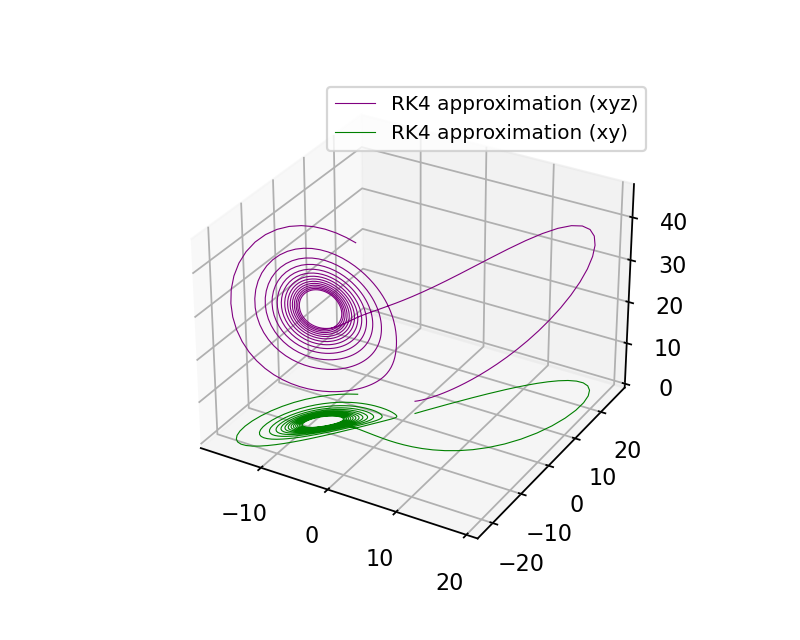

/var/folders/2j/_7xtm6r94611njcv_8yd7zzc0000gn/T/ipykernel_50918/245122735.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [35]:
fig = plt.figure('Lorenz System of ODEs', figsize=(5, 4), dpi=100)
ax = fig.gca(projection='3d')


def animate(i): # A function to call the animation
    ax.clear()
    ax.set(facecolor='white')
    ax.plot(rk4_data[:i, 0], rk4_data[:i, 1], rk4_data[:i, 2],
            color='purple', lw=0.5, label='RK4 approximation (xyz)') # plots x,y,z
    ax.plot(rk4_data[:i, 0], rk4_data[:i, 1], 
            color='green', lw=0.5, label='RK4 approximation (xy)') # plots x,y
    ax.legend(fontsize=9)


ani = animation.FuncAnimation(
    fig, animate, np.arange(3000), interval=5, repeat=False) # anim object; 3,000 frames, 5ms delay, no repeat
plt.show()

---
# **Part II.1: Hankel Matrix**

SciPy is used to create the Hankel matrix from the RK4 data that is stored in the variable 'rk4_data'. Refer to the link in the references section for documentation on the Hankel function used in the SciPy library.

**NOTE**: The Hankel matrix might be wrong here but it is a matrix to do computations on until it can be fixed. It does not seem right but I moved on to the next part and included it anyways.

---

In [7]:
# import hankel function from SciPy
from scipy.linalg import hankel
from numpy import linalg as LA # LA is a standard convention for linalg

In [8]:
rk4_data # check that the data is stored in 'rk4_data'

array([[ 1.        ,  2.        ,  3.        ],
       [ 1.10668018,  2.24217232,  2.94309092],
       [ 1.22751058,  2.51086379,  2.89299937],
       ...,
       [-4.42954579, -2.33951975, 25.62047754],
       [-4.23493385, -2.43106296, 25.04812599],
       [-4.06842247, -2.54024475, 24.49070858]])

**NOTE:** The interval is sliced very small to the 50th iteration since my computer took a long time to compute the matrix up to 500 iterations. Notice that the length of both matrices for only 50 iterations is printed in the following cells and is only 150 elements long. At 500 iterations, the length of both matrices is 3,000 and the length of both matrices when considering all iterations is 30,000 elements. This would make a 30,000 by 30,000 matrix to compute on. 

**Ideas:** 
 - Fix the Hankel matrix
 - Compute this on a computer with more processor/GPU cores
 - Use a different method
 - ...

In [9]:
hank = hankel(rk4_data[:50,:]) # python makes slicing the interval easy


print('This is the Hankel matrix computed by SciPy:\n', hank)
print('\nA check of the length of the Hankel matrix: ', len(hank), ' elements')

This is the Hankel matrix computed by SciPy:
 [[ 1.          2.          3.         ...  0.59686842 -7.85759055
  31.04294083]
 [ 2.          3.          1.10668018 ... -7.85759055 31.04294083
   0.        ]
 [ 3.          1.10668018  2.24217232 ... 31.04294083  0.
   0.        ]
 ...
 [ 0.59686842 -7.85759055 31.04294083 ...  0.          0.
   0.        ]
 [-7.85759055 31.04294083  0.         ...  0.          0.
   0.        ]
 [31.04294083  0.          0.         ...  0.          0.
   0.        ]]

A check of the length of the Hankel matrix:  150  elements


The dot product of the matrix stored in the last variable is made square and stored in the variable hankel_matrix by taking the dot product of it and the transpose, then the matrix is printed and the length is checked again.

In [10]:
hankel_matrix = hank @ hank.T # dot product between Hankel and Hankel.transpose


print('This is the square Hankel matrix:\n', hankel_matrix)
print('\nA check of the length of the Hankel matrix: ', len(hankel_matrix), ' elements')

This is the square Hankel matrix:
 [[ 5.11356216e+04  2.49158227e+04  2.47774582e+04 ...  7.80105098e+01
   5.42282911e+01  3.10429408e+01]
 [ 2.49158227e+04  5.11346216e+04  2.49138227e+04 ...  1.19755727e+01
   7.74136414e+01  6.20858817e+01]
 [ 2.47774582e+04  2.49138227e+04  5.11306216e+04 ...  6.26983881e+01
   1.07818358e+01  9.31288225e+01]
 ...
 [ 7.80105098e+01  1.19755727e+01  6.26983881e+01 ...  1.02576216e+03
  -2.48612666e+02  1.85285509e+01]
 [ 5.42282911e+01  7.74136414e+01  1.07818358e+01 ... -2.48612666e+02
   1.02540590e+03 -2.43922718e+02]
 [ 3.10429408e+01  6.20858817e+01  9.31288225e+01 ...  1.85285509e+01
  -2.43922718e+02  9.63664175e+02]]

A check of the length of the Hankel matrix:  150  elements


---

# **Part II.2: LU Decomposition**

SciPy is used to compute the Cholesky factor, then two loops created to solve the forward and backward substitutions in the LU decomposition. Refer to the references for documentation on the Cholesky function in the SciPy library.

---

In [11]:
# import chelesky function from SciPy
from scipy.linalg import cholesky

SciPy makes this easy. The Cholesky function is used and the square Hankel matrix data is passed, along with a second term that specifies the output should be lower triangular.

In [12]:
L = cholesky(hankel_matrix, lower=True) 
len_L = len(L)


print(L)

[[ 2.26131868e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.10182713e+02  1.97469976e+02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.09570838e+02  6.50276604e+01  1.86805397e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.44977957e-01 -1.31843003e-01  1.79182758e-01 ...  2.13989838e+01
   0.00000000e+00  0.00000000e+00]
 [ 2.39808266e-01  2.58221108e-01 -1.72830506e-01 ... -6.20030018e+00
   2.12830799e+01  0.00000000e+00]
 [ 1.37278046e-01  2.37809388e-01  3.35231020e-01 ...  2.11506745e+00
  -5.63227216e+00  2.05108249e+01]]


Create a function for the forward and backward substitution.

In [13]:
def solveLU(L, U, b):
    L = np.array(L, float)
    U = np.array(U, float)
    b = np.array(b, float)
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)

    for i in range(n-1):
        sumj = 0
        for j in range(i):
            sumj += L[i, j]*y[j]
        y[i] = (b[i]-sumj)/L[i, i]

    for i in range(n-1, -1, -1):
        sumj = 0
        for j in range(i+1, n):
            sumj += U[i, j] * x[j]
        x[i] = (y[i]-sumj)/U[i, i]
        
    return x

Create a function to loop and solve.

In [14]:
def run_solver(n):

    for k in range(n+1):
        L = cholesky(hankel_matrix, lower=True)
        LT = np.transpose(L)
        b = np.dot(hankel_matrix, np.ones(len_L))

        x = solveLU(L, LT, b)
        
    return x

Call and print the solver, which will output the solution of the LU decomp for the sliced interval of x, y, and z values from interation 0 to 50.

In [15]:
print('This is the solution:\n', run_solver(i))

This is the solution:
 [1.02308721 1.03229826 1.0304157  1.00767599 1.00200616 1.00008838
 0.99730927 0.99648965 0.99654857 0.99440306 0.99340176 0.99395993
 0.99224075 0.99100265 0.99194306 0.99080887 0.98942379 0.99061828
 0.99018749 0.98877416 0.99006652 0.99039769 0.98909295 0.99031628
 0.99140213 0.99034988 0.99134638 0.99311322 0.99245149 0.99309196
 0.99540422 0.99525108 0.99545184 0.99812096 0.99856014 0.99829484
 1.00109179 1.00215864 1.00146292 1.00413367 1.00580242 1.00477007
 1.00705374 1.009228   1.00799834 1.00964845 1.01215766 1.01089586
 1.01170453 1.01431015 1.01318382 1.01300721 1.01542152 1.01457779
 1.01335925 1.01527678 1.01482395 1.01260968 1.01374711 1.01374334
 1.01068604 1.01082323 1.01127236 1.00762117 1.00663524 1.00748836
 1.00356711 1.001454   1.00261429 0.99879266 0.99567467 0.99700392
 0.99366649 0.98978777 0.99111412 0.98863004 0.98434289 0.98547131
 0.9841639  0.97990695 0.98063593 0.98074863 0.97701457 0.97716261
 0.97881829 0.97610621 0.97554994 0.978

---

# **Part III: Poincaré Map**

Four lists are created. Three lists are used to store each x, y, and z values, and a fourth is created to store the iteration.

The goal is to restrict one of the three dimensions of the RK4 output data to get a 2D system. This is done of two variables, first y then the x values. A interval is defined on each of the two restricted variables and the any point that falls within that tolernce is stored in the the list above.  

Two functions are used to call these loops through the data stored in 'rk4_data'.

---

In [16]:
# four lists initialized
poinc_x = []
poinc_y = []
poinc_z = []
iteration_count = []

<IPython.core.display.Javascript object>


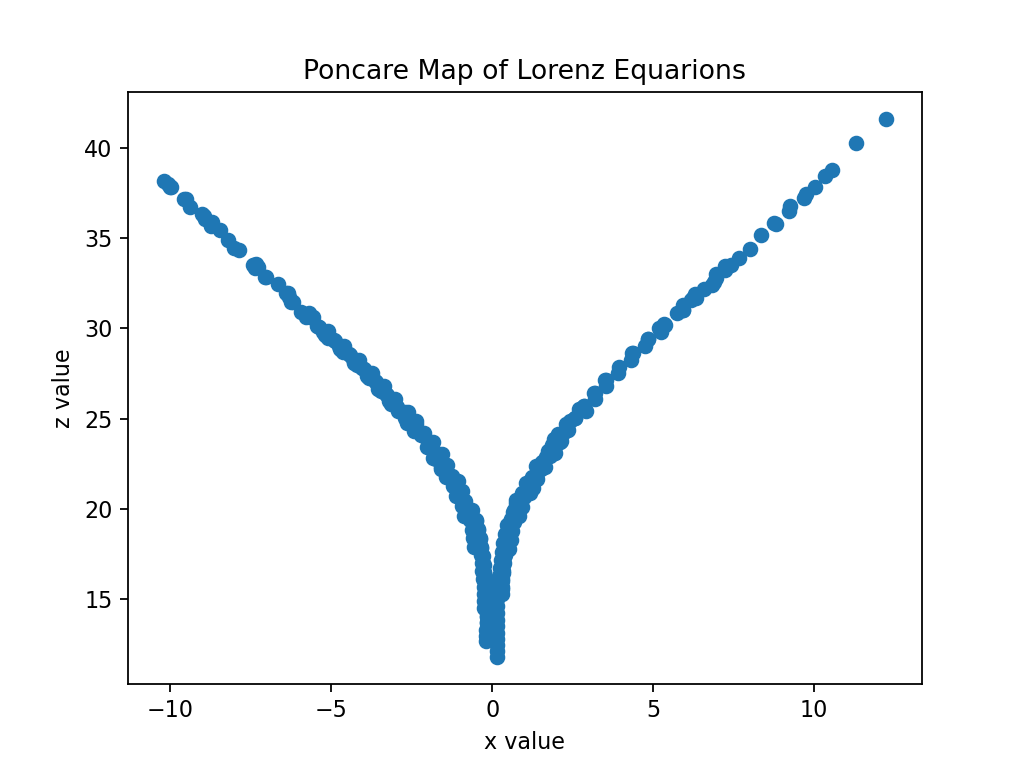

In [17]:
def center_poinc(i):
    
    for i in range(0, n-1, 1):
        if rk4_data[i, 1] < 0.25 and rk4_data[i, 1] > -0.25:
            poinc_x.append(float(rk4_data[i, 0])) # adds elements to lists
            poinc_y.append(float(rk4_data[i, 1]))
            poinc_z.append(float(rk4_data[i, 2]))
            iteration_count.append(float(i))
            
    return np.array([poinc_x, poinc_y, poinc_z, iteration_count])


p = center_poinc(i) # call function, define as p


plt.figure() # 2D plot
plt.title("Poncare Map of Lorenz Equarions")
plt.ylabel('z value')
plt.xlabel('x value')
plt.scatter(p[0], p[2])
plt.show()

Another 2 dimensional semi-log plot is created to compare the z value to the time it occured. Notice that the frequency the attractor passes through the plane increases as time goes on.

**NOTE:** I am not sure about this. I have very little experience with these graphs.

**Ideas:**
- Check this graph
- Add more graphs
- ...

<IPython.core.display.Javascript object>


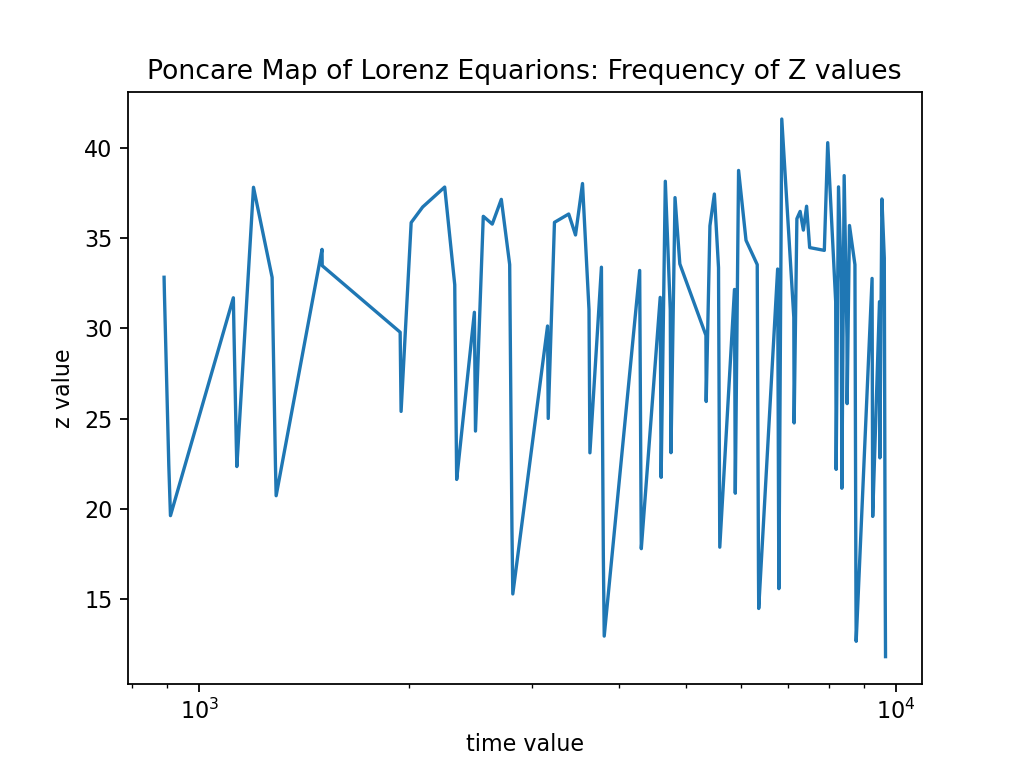

In [18]:
# semilog plot
plt.figure()
plt.title("Poncare Map of Lorenz Equarions: Frequency of Z values")
plt.xlabel('time value')
plt.ylabel('z value')
plt.semilogx(p[3], p[2]) 
plt.show()

A three-dimensional graph is created to show the slices position along the attractor. 

<IPython.core.display.Javascript object>


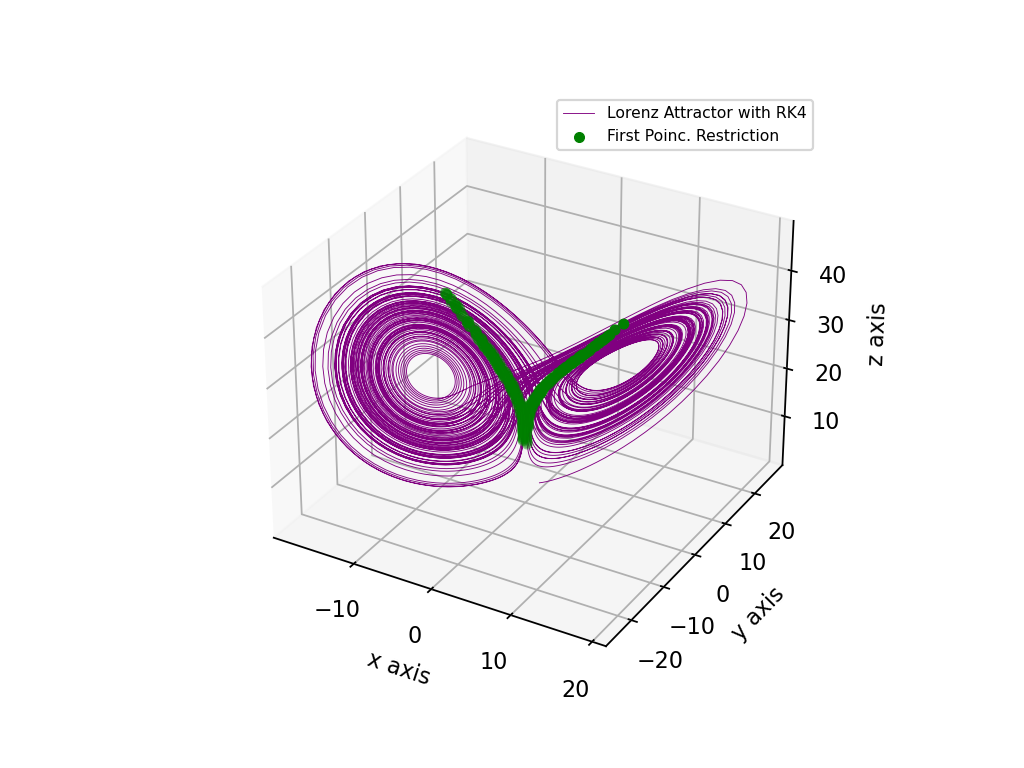

In [19]:
plt.figure()
ax2 = plt.axes(projection='3d')
ax2.clear()
ax2.set(facecolor='white')
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_zlabel('z axis')
ax2.plot3D(rk4_data[:i,0], rk4_data[:i,1], rk4_data[:i,2], 'purple', lw=0.4, label='Lorenz Attractor with RK4')
ax2.scatter3D(p[0], p[1], p[2], color='green', lw=0.5, label='First Poinc. Restriction')
ax2.legend(fontsize=7)
plt.show()

Clear out the lists and then do the loop again but for another interval.

In [20]:
poinc_x = []
poinc_y = []
poinc_z = []
iteration_count = []

<IPython.core.display.Javascript object>


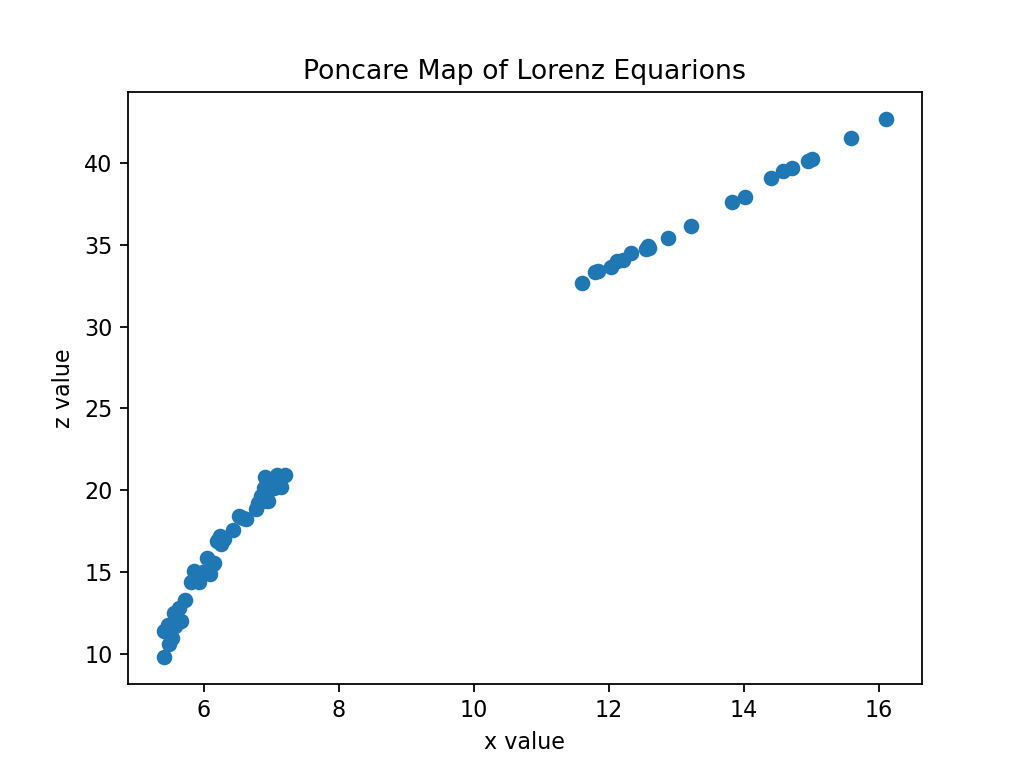

<IPython.core.display.Javascript object>


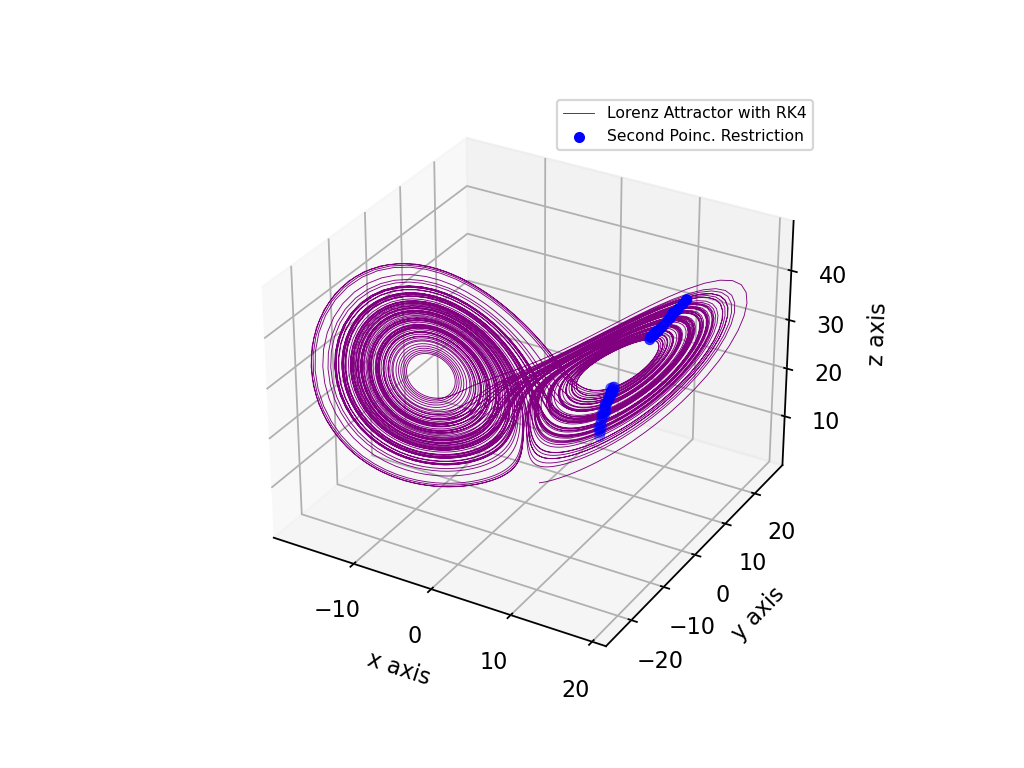

In [21]:
def side_poinc(i):
    for i in range(0, n-1, 1):
        if rk4_data[i, 1] < 10.25 and rk4_data[i, 1] > 9.75:
            poinc_x.append(float(rk4_data[i, 0]))
            poinc_y.append(float(rk4_data[i, 1]))
            poinc_z.append(float(rk4_data[i, 2]))
            iteration_count.append(float(i))
            
    return np.array([poinc_x, poinc_y, poinc_z])


p = side_poinc(i)


plt.figure() # 2D plot
plt.title("Poncare Map of Lorenz Equarions")
plt.ylabel('z value')
plt.xlabel('x value')
plt.scatter(p[0], p[2])
plt.show()

plt.figure() # 3D plot
ax2 = plt.axes(projection='3d')
ax2.clear()
ax2.set(facecolor='white')
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_zlabel('z axis')
ax2.plot3D(rk4_data[:i,0], rk4_data[:i,1], rk4_data[:i,2], 'purple', lw=0.4, label='Lorenz Attractor with RK4')
ax2.scatter3D(p[0], p[1], p[2], color='blue', lw=0.5, label='Second Poinc. Restriction')
ax2.legend(fontsize=7)
plt.show()

Each time the slice was crossed by the attractor, the iteration is recorded in the list 'iteration_count'. The distance between each crossing can be computed with the following loop. The output of this loop is a list of the time difference between each point in the blue scatter plot on the last attractor.

In [22]:
# Time diffference between each step
# could be used to find the avg. between entire stream
n = len(iteration_count[:i])
time_dif_list = []

for i in range(0, n, 1):
    time_dif = abs(iteration_count[i-1] - iteration_count[i])
    time_dif_list.append(time_dif)

    
time_dif_list

[8576.0,
 155.0,
 467.0,
 65.0,
 22.0,
 45.0,
 22.0,
 46.0,
 22.0,
 49.0,
 387.0,
 85.0,
 904.0,
 22.0,
 133.0,
 22.0,
 132.0,
 81.0,
 240.0,
 1.0,
 21.0,
 44.0,
 66.0,
 67.0,
 22.0,
 121.0,
 22.0,
 432.0,
 81.0,
 669.0,
 230.0,
 22.0,
 47.0,
 73.0,
 22.0,
 64.0,
 253.0,
 284.0,
 22.0,
 44.0,
 22.0,
 115.0,
 22.0,
 52.0,
 525.0,
 22.0,
 157.0,
 540.0,
 673.0,
 219.0,
 65.0,
 22.0,
 44.0,
 22.0,
 45.0,
 22.0,
 47.0,
 74.0,
 89.0,
 293.0]

The list of time differences can be summed with another simple loop then divided by the number of differences to find the average time difference. The output is a float and should be rounded to some integer. It is left as a float for now because of round-off errors for whatever it might be used in.

In [23]:
n_time_dif_list = len(time_dif_list)
sum_time_dif = 0

for i in range(n_time_dif_list):
    sum_time_dif += time_dif_list[i]
    avg_time_dif = sum_time_dif/n_time_dif_list

In [24]:
print('The average amount of iterations between each point is: ', avg_time_dif, ' iterations')

The average amount of iterations between each point is:  285.8666666666667  iterations


---
# **Part 3: PySINDY**

The idea for this next part is to use the output data from the 4th-order Runge Kutta approximation in part 1 with the PySINDY library to get the system of ODE's that created the chaotic data.

From there, the restricted data created by the Poincaré map will be used to try to do the same. Remember that a interval was used to collect the points on the restricted element. If the tolerence is chosen too small, i.e. just one value and not an interval, then too few points are collected. Too large, and it accounts for all of the data.

This section will show that PySINDy works great on all of the data but does not show anything helpful when one of the elements are restricted to most intervals.

**Ideas:** 
- If the RK4 simulation of the Lorenz Atractor is run for a longer time, can enough data be recorded so that PySINDy to obtain the Lorenz equations, even as the interval of the restriction on one of the three variables is decreased. 

---

In [25]:
# import PySINDy library
# Look in the references for documentation and installation
import pysindy as ps

In [26]:
rk4_data # check that the RK4 approximation data is stored properly

array([[ 1.        ,  2.        ,  3.        ],
       [ 1.10668018,  2.24217232,  2.94309092],
       [ 1.22751058,  2.51086379,  2.89299937],
       ...,
       [-4.42954579, -2.33951975, 25.62047754],
       [-4.23493385, -2.43106296, 25.04812599],
       [-4.06842247, -2.54024475, 24.49070858]])

### PySINDy used on all of the RK4 data.

This is the standard process given in the PySINDy tutorials on YouTube. Check the link in the references section for this video and read the comments next to the code for code description. We see that PySINDy has no problem finding the equations when the list of all RK4 data is imported.

In [27]:
feature_names = ['x', 'y', 'z']
opt = ps.STLSQ(threshold=0.1) # this is lambda
model = ps.SINDy(feature_names=feature_names, optimizer=opt)
model.fit(rk4_data, t=dt) # input all data from 'rk4_data'
model.print() # print the PySINDy model

x' = -9.978 x + 9.978 y
y' = 27.802 x + -0.961 y + -0.994 x z
z' = -2.659 z + 0.997 x y


### PySINDy used on the restricted data.

PySINDy is used again with the restricted data from above. The function used above is changed so that 0's are added to the lists for each value that is not within the interval on the plane.

In [28]:
# NOTE: Here is the restriction on one element
plane_value = 10 # chosen 'plane'
threshold = 1 # size of the interval/tolerance
upper_bound = plane_value + threshold/2 # center the interval on the plane value
lower_bound = plane_value - threshold/2


n = len(vector_t) # check val


poinc_x_sparse = [] # create new lists
poinc_y_sparse = []
poinc_z_sparse = []

In [29]:
def collect_data(i):
    
    for i in range(0, n-1, 1):
        if rk4_data[i, 0] < upper_bound and rk4_data[i, 0] > lower_bound:
            poinc_x_sparse.append(float(rk4_data[i, 0]))
            poinc_y_sparse.append(float(rk4_data[i, 1]))
            poinc_z_sparse.append(float(rk4_data[i, 2]))
        else:
            poinc_x_sparse.append(0) # adding the zeros
            poinc_y_sparse.append(0)
            poinc_z_sparse.append(0)
            
    return np.array([poinc_x_sparse, poinc_y_sparse, poinc_z_sparse])


p = collect_data(i)

In [31]:
poinc_sparse = p.T # take the transpose of the data to flip it


print('The sparse data:\n', poinc_sparse, '\nNOTE: some of the entries should be non-zero.')

The sparse data:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 
NOTE: some of the entries should be non-zero.


Use the same commands as above and PySINDy gives a lot of extra terms. There is not a lot of data collected over the chosen time interval when x is restricted to 9.5<x<10.5.

In [32]:
feature_names = ['x', 'y', 'z']
opt = ps.STLSQ(threshold=0.1) # this is lambda
model = ps.SINDy(feature_names=feature_names, optimizer=opt)
model.fit(poinc_sparse, t=dt)
model.print()

x' = -3513.472 x + 3605.391 y + -1420.373 z + -1519.618 x^2 + 624.206 x y + 751.668 x z + -69.660 y^2 + -191.264 y z + -30.515 z^2
y' = -4003.283 x + 4077.826 y + -1111.661 z + -1286.311 x^2 + 470.956 x y + 637.937 x z + -56.546 y^2 + -165.923 y z + -21.507 z^2
z' = -0.151 1 + -10924.739 x + 9894.998 y + -3842.271 z + -4348.673 x^2 + 1889.993 x y + 2191.755 x z + -212.880 y^2 + -566.497 y z + -97.851 z^2


Instead of increasing the time the RK4 is run, the data is restricted to a larger interval, then the interval is decreased to see what happens. It turns out that the interval needs to be very large, possibly all of the data points, for PySINDy to give anything without a lot of extra terms.

In [33]:
# NOTE: Here is the restriction on one element
plane_value = 0
threshold = 38 # this might include all terms since the interval is -19<x<19
upper_bound = plane_value + threshold/2
lower_bound = plane_value - threshold/2


n = len(vector_t)


poinc_x_sparse = [] # clear lists
poinc_y_sparse = []
poinc_z_sparse = []

In [34]:
def recollect_data(i):
    
    for i in range(0, n-1, 1):
        if rk4_data[i, 0] < upper_bound and rk4_data[i, 0] > lower_bound:
            poinc_x_sparse.append(float(rk4_data[i, 0]))
            poinc_y_sparse.append(float(rk4_data[i, 1]))
            poinc_z_sparse.append(float(rk4_data[i, 2]))
        else:
            poinc_x_sparse.append(0)
            poinc_y_sparse.append(0)
            poinc_z_sparse.append(0)
            
    return np.array([poinc_x_sparse, poinc_y_sparse, poinc_z_sparse])


p = recollect_data(i)


poinc_sparse = p.T


feature_names = ['x', 'y', 'z']
opt = ps.STLSQ(threshold=0.1) # this is lambda
model = ps.SINDy(feature_names=feature_names, optimizer=opt)
model.fit(poinc_sparse, t=dt) # loading the data
model.print() # print

x' = -9.978 x + 9.978 y
y' = 27.802 x + -0.961 y + -0.994 x z
z' = -2.659 z + 0.997 x y


**Result:** If the interval is chosen smaller, then PySINDy gives a lot of extra terms.

---
# **References:**

Poincare Maps (overview video) - https://www.youtube.com/watch?v=HbnFQJPwZoI

Poincare Maps (properties) - https://people.math.wisc.edu/~angenent/519.2016s/notes/poincare-map.html

pySINDy - https://github.com/dynamicslab/pysindy

        @article{Kaptanoglu2022,
          doi = {10.21105/joss.03994},
          url = {https://doi.org/10.21105/joss.03994},
          year = {2022},
          publisher = {The Open Journal},
          volume = {7},
          number = {69},
          pages = {3994},
          author = {Alan A. Kaptanoglu and Brian M. de Silva and Urban Fasel and Kadierdan Kaheman and Andy J. Goldschmidt and Jared Callaham and Charles B. Delahunt and Zachary G. Nicolaou and Kathleen Champion and Jean-Christophe Loiseau and J. Nathan Kutz and Steven L. Brunton},
          title = {PySINDy: A comprehensive Python package for robust sparse system identification},
          journal = {Journal of Open Source Software}
          }

Hankel Matrix - https://en.wikipedia.org/wiki/Hankel_matrix

SciPy Hankel Matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.hankel.html



**(papers will be added soon...)**

---